In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt

#sys add directory
import sys
sys.path.append('../src')
from dotenv import load_dotenv

import sys
# Load environment variables

from config import Config
from openai_utils import *

from config import Config

# Assuming .env is in the appended path
dotenv_path = '../src/.env'
load_dotenv(dotenv_path)



/Users/aashnashah/opt/anaconda3/envs/xray_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


environ({'COMMAND_MODE': 'unix2003', 'DISPLAY': '/private/tmp/com.apple.launchd.z2Wbqe1Qh2/org.xquartz:0', 'HOME': '/Users/aashnashah', 'LOGNAME': 'aashnashah', 'LaunchInstanceID': '87DEAD83-5A74-4A3C-9CD9-4B685129211E', 'MallocNanoZone': '0', 'ORIGINAL_XDG_CURRENT_DESKTOP': 'undefined', 'PATH': '/Users/aashnashah/opt/anaconda3/envs/xray_env/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/bin:/bin:/usr/sbin:/sbin', 'SECURITYSESSIONID': '186b2', 'SHELL': '/bin/zsh', 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.J1rja8Q1yG/Listeners', 'TMPDIR': '/var/folders/bs/d4qy9fyd0qx3k7_5vtrvzv580000gn/T/', 'USER': 'aashnashah', 'VSCODE_AMD_ENTRYPOINT': 'vs/workbench/api/node/extensionHostProcess', 'VSCODE_CODE_CACHE_PATH': '/Users/aashnashah/Library/Application Support/Code/CachedData/8b3775030ed1a69b13e4f4c628c612102e30a681', 'VSCODE_CRASH_REPORTER_PROCESS_TYPE': 'extensionHost', 'VSCODE_CWD': '/', 'VSCODE_HANDLES_UNCAUGHT_ERRORS': 'true', 'VSCODE_IPC_HOOK': '/Users/aashnashah/Library/Application Suppo

True

In [3]:
import os
from gemini_utils import *
from openai_utils import *

In [5]:
OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')
OPENAI_ORG_KEY = os.getenv('OPENAI_ORG_KEY')
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')

config = Config('radiology')
config.headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {OPENAI_API_KEY}"
        }

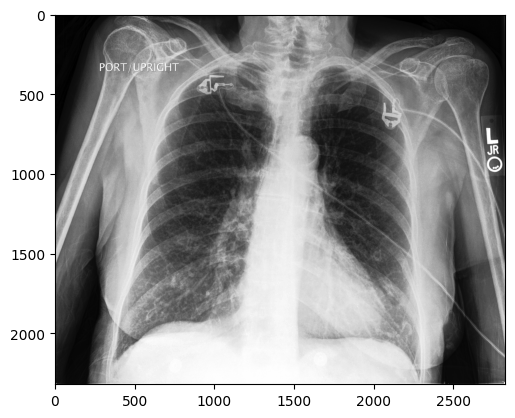

Processed test/patient64769/study1/view1_frontal.jpg
Abnormal.

The X-ray shows the presence of some abnormal structures or devices on both sides, which are likely medical implants such as a port-a-cath and an orthopedic device on the shoulders, indicating the patient has undergone medical procedures. Such devices are not present in a normal chest X-ray.


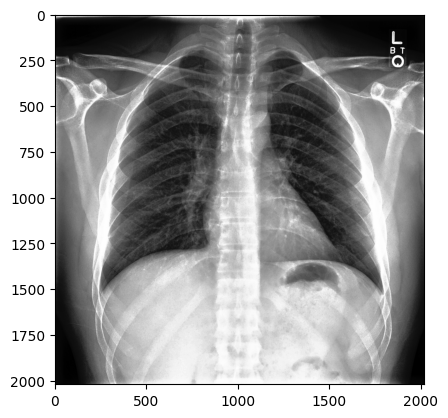

Processed test/patient64750/study1/view1_frontal.jpg
Abnormal.

The left side of the chest (which appears on the right side of the image due to the perspective of the X-ray) shows a pleural effusion, a collection of fluid in the pleural space surrounding the lung. This is indicated by the whitish area at the base of the lung, where the normally sharp lung border is obscured. This is not present within the normal lung anatomy and suggests an underlying pathology that would need to be further evaluated and treated.


,filename,true_label,gemini_response,gpt_response


In [21]:
prompt = "The following is a matching game. I have provided an image from a medical textbook. Does the X-ray in the image match with the term ""normal"" or ""abnormal""? Please answer concisely with either ""abnormal"" or ""normal"". Please justify your decision."
healthy = ['test/patient64769/study1/view1_frontal.jpg', #PredictedDiagnosis = TRUE , abnormal = FALSE 
           'test/patient64742/study1/view1_frontal.jpg', #PredictedDiagnosis = TRUE , abnormal = TRUE 
           'test/patient64750/study1/view1_frontal.jpg', #PredictedDiagnosis = FALSE , abnormal = FALSE 
           'test/patient64743/study1/view1_frontal.jpg', #PredictedDiagnosis = FALSE , abnormal = TRUE 
           ]
df = pd.DataFrame(columns=['filename', 'true_label', 'gemini_response', 'gpt_response'])

# Define your images and their true labels
images = [ 'test/patient64769/study1/view1_frontal.jpg', 
          #'test/patient64742/study1/view1_frontal.jpg', 
          'test/patient64750/study1/view1_frontal.jpg']
          #'test/patient64743/study1/view1_frontal.jpg', 
          #'test/patient64754/study1/view1_frontal.jpg', 
          #'test/patient64756/study1/view1_frontal.jpg', 
          #'test/patient64760/study1/view1_frontal.jpg']
#images = [#'test/patient64754/study1/view1_frontal.jpg', 
#          'test/patient64756/study1/view1_frontal.jpg', 'test/patient64760/study1/view1_frontal.jpg']

true_labels = ['Normal', 'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Normal', 'Normal']  # replace with your true labels

# Process each image
for i, (img, true_label) in enumerate(zip(images, true_labels)):
    # plot the chest x-ray with imshow
    dir = '../data/radiology/CheXpert/'
    path = dir + img
    plt.imshow(plt.imread(path), cmap='gray')
    plt.show()
    
    #gemini_response = process_image(config, load_model(config), img, prompt, config.safety_settings)[-1]
    gpt_response = process_request(img, prompt, config, max_tokens=100)[-1]
    print(gpt_response)
    # Append the results to the DataFrame
    # df.loc[i] = [img, true_label, gemini_response, gpt_response]

# Print the DataFrame
display(df)
df.to_csv('radiology_clinical_reasoning.csv', index=False)

In [31]:
# prompt = "The following is a matching game. I have provided an image from a medical textbook. Does the X-ray in the image match with the term ""normal"" or ""abnormal""? Please answer concisely with either ""abnormal"" or ""normal"". You are not providing a medical diagnoses. Please justify your decision."
# healthy = ['test/patient64769/study1/view1_frontal.jpg', #PredictedDiagnosis = TRUE , abnormal = FALSE 
#            'test/patient64742/study1/view1_frontal.jpg', #PredictedDiagnosis = TRUE , abnormal = TRUE 
#            'test/patient64750/study1/view1_frontal.jpg', #PredictedDiagnosis = FALSE , abnormal = FALSE 
#            'test/patient64743/study1/view1_frontal.jpg', #PredictedDiagnosis = FALSE , abnormal = TRUE 
#            ]
# healthy = ['test/patient64754/study1/view1_frontal.jpg', 'test/patient64756/study1/view1_frontal.jpg', 'test/patient64760/study1/view1_frontal.jpg']

# for img in healthy:
#     print(process_image(config, load_model(config), img, prompt, config.safety_settings)[-1])


In [33]:
prompt = "The following is a matching game. I have provided an image from a medical textbook. Does the X-ray in the image match with the term No Finding, Enlarged Cardiomediastinum, Cardiomegaly, Lung Opacity, Lung Lesion, Edema, Consolidation, Pneumonia, Atelectasis, Pneumothorax, Pleural Effusion, Pleural Other, Fracture, Support Devices? Please answer concisely with either ""No Finding"" or ""Other"". You are not providing a medical diagnoses. If you choose other, explain why."
healthy = ['test/patient64754/study1/view1_frontal.jpg', 'test/patient64756/study1/view1_frontal.jpg', 'test/patient64760/study1/view1_frontal.jpg']

for img in healthy:
    print(process_request(img, prompt, 100)[-1])


Processed test/patient64754/study1/view1_frontal.jpg
Other.

The heart silhouette appears enlarged, indicating possible cardiomegaly, and there are opacities in the lung fields that could correspond to various pulmonary conditions. Additionally, there are devices present such as a pacemaker and sternal wires, which fit the category "Support Devices."
Processed test/patient64756/study1/view1_frontal.jpg
Other.

As a language model, I am not capable of making medical diagnoses, but the provided chest X-ray image seems to show some abnormalities that could be associated with one or more of the terms you mentioned. It would require a medical professional to analyze the image thoroughly to determine the proper match from the given list. It is not appropriate for me to attempt to provide a specific explanation regarding the medical content of the image.
Processed test/patient64760/study1/view1_frontal.jpg
Other.

The X-ray image shows evidence of medical devices, indicated by the visible str

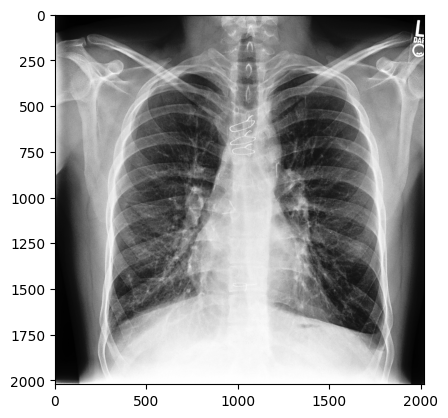

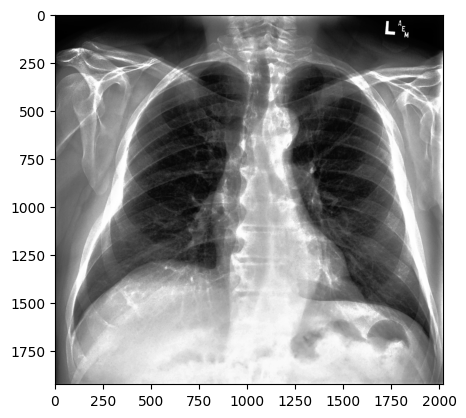

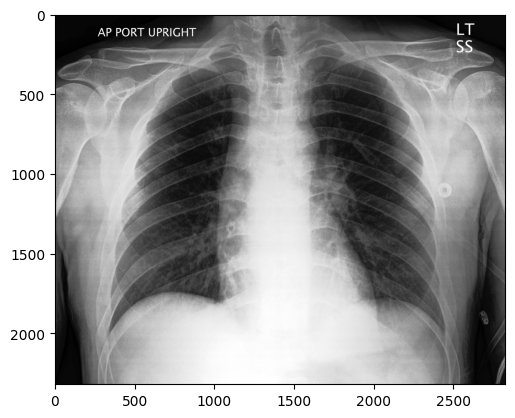

In [21]:
import matplotlib.pyplot as plt

for img in healthy:
    dir = 'data/CheXpert/'
    img = dir + img
    # plot the chest x-ray with imshow
    plt.imshow(plt.imread(img), cmap='gray')
    plt.show()
    
    

In [6]:
gemini_results = pd.read_csv('data/gemini_chexpert_results_20240312.csv')
demographics = pd.read_csv('data/processed_test_set_2024-03-10.csv')

display(gemini_results.head())
display(demographics.head())

,Filename,PromptID,Response
0,test/patient64741/study1/view1_frontal.jpg,0,normal
1,test/patient64741/study1/view1_frontal.jpg,1,normal
2,test/patient64741/study1/view1_frontal.jpg,2,normal
3,test/patient64741/study1/view1_frontal.jpg,3,normal
4,test/patient64741/study1/view1_frontal.jpg,4,normal


,Path,PATIENT,Study,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,...,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Race,Ethnicity,abnormal
0,test/patient64741/study1/view1_frontal.jpg,patient64741,test/patient64741/study1,Male,57.0,White,Non-Hispanic/Non-Latino,0,1,1,...,0,0,0,0,0,0,1,White,Non-Hispanic,1
1,test/patient64742/study1/view1_frontal.jpg,patient64742,test/patient64742/study1,Female,69.0,White,Non-Hispanic/Non-Latino,0,1,0,...,0,1,0,0,0,0,0,White,Non-Hispanic,1
2,test/patient64743/study1/view1_frontal.jpg,patient64743,test/patient64743/study1,Male,88.0,"White, non-Hispanic",Unknown,0,1,1,...,0,1,0,0,0,0,0,White,Non-Hispanic,1
3,test/patient64744/study1/view1_frontal.jpg,patient64744,test/patient64744/study1,Male,57.0,Other,Hispanic/Latino,0,0,0,...,0,0,0,0,0,0,1,Other,Hispanic,1
4,test/patient64745/study1/view1_frontal.jpg,patient64745,test/patient64745/study1,Male,92.0,White,Non-Hispanic/Non-Latino,0,1,1,...,0,1,0,1,0,0,1,White,Non-Hispanic,1


In [ ]:
joined = gemini_results.merge(demographics, left_on='Path', right_on='', how='left')